In [1]:
#gibt forecast und predict, vorgehen nach Box-Jenkins Methode
import numpy as np
from pandas import read_csv
import pandas as pd
from pandas import datetime
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import math as m

C:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
DATA_FILE="Dropbox/Masterarbeit/Masterarbeit/Datensätze/Geburtenrate/Datensatz.xlsx"
df=pd.read_excel(DATA_FILE, header=0, parse_dates=[0], index_col='Jahr-Monat',squeeze=True)

# Ein array mit allen Einträgen --> zur besseren Weiterverarbeitung
ZR=df.values

In [3]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(ZR, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -0.932632
p-value                          0.777036
#Lags Used                      21.000000
Number of Observations Used    841.000000
dtype: float64


In [4]:
kpssoutput_c=kpss(ZR,regression='c')
print(kpssoutput_c)

(2.9202598296715414, 0.01, 21, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


C:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


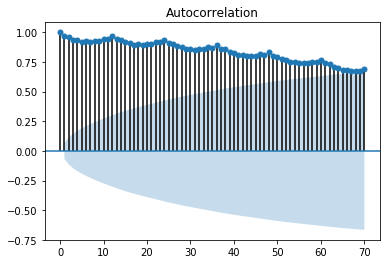

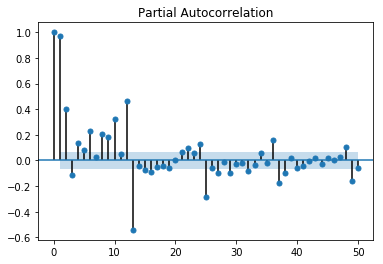

In [5]:
plot_acf(ZR,lags=70)
pyplot.show()

plot_pacf(ZR, lags=50)
pyplot.show()

In [4]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)

# invert differenced value: wrong
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# right one
def inverse_diff(history, yhat, interval):
    equal=list()
    for i in range(len(yhat)):
        value= yhat[i]+history[i]
        equal.append(value)
    return np.array(equal)

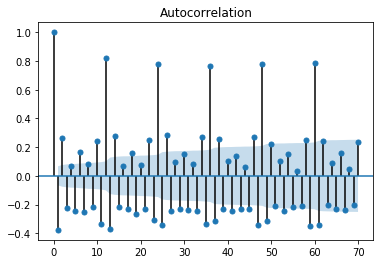

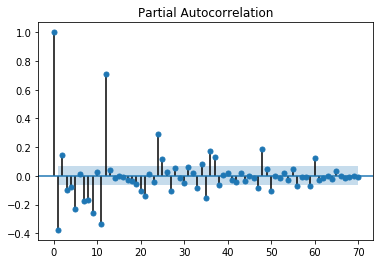

In [5]:
# Transformtion der Daten, da Saisonalität und Non-Stationarity vorhanden 
# 1. log
ZR_log=np.log(ZR)

# 1.1 difference = 1
ZR_log_diff_1=difference(ZR_log,1)

# plot
plot_acf(ZR_log_diff_1,lags=70)
plot_pacf(ZR_log_diff_1,lags=70)
pyplot.show()

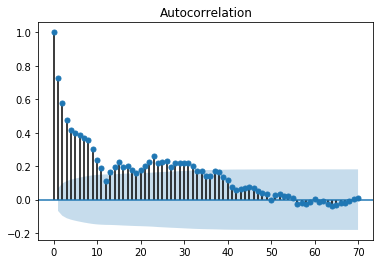

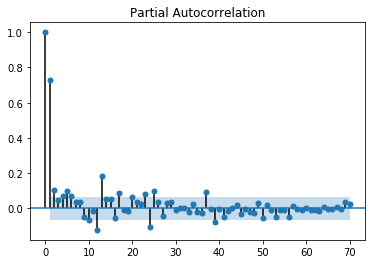

In [6]:
# 1.2 difference = 12
ZR_log_diff_12=difference(ZR_log,12)
plot_acf(ZR_log_diff_12,lags=70)
plot_pacf(ZR_log_diff_12,lags=70)
pyplot.show()

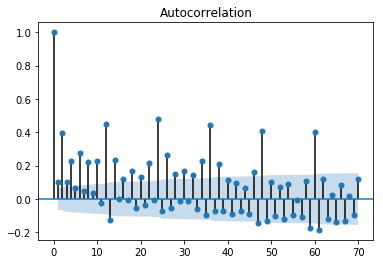

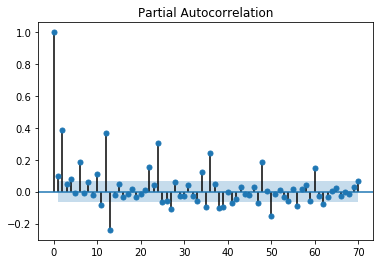

In [12]:
# 1.3: 1.1+1.2
ZR_log_diff=difference(ZR_log,12)+difference(ZR_log[11:],1)
plot_acf(ZR_log_diff,lags=70)
plot_pacf(ZR_log_diff,lags=70)
pyplot.show()

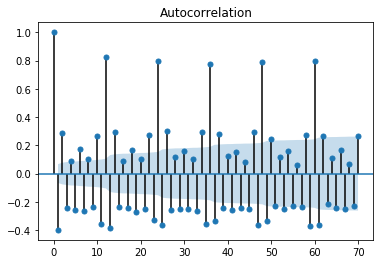

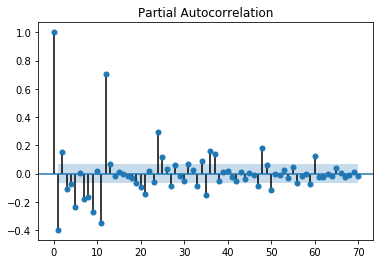

In [5]:
# Transformation der Daten: 
# 2. sqrt
ZR_sqrt =np.sqrt(ZR)

#2.1 difference 1
ZR_sqrt_diff_1=difference(ZR_sqrt,1)
plot_acf(ZR_sqrt_diff_1,lags=70)
plot_pacf(ZR_sqrt_diff_1,lags=70)
pyplot.show()

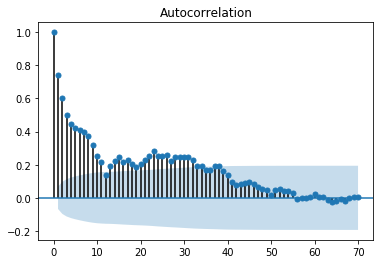

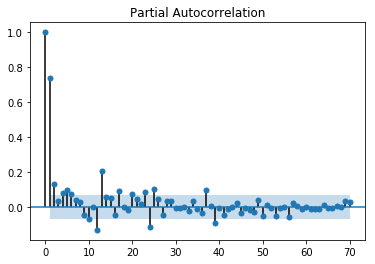

In [7]:
# 2.2 difference = 12
ZR_sqrt_diff_12=difference(ZR_sqrt,12)
plot_acf(ZR_sqrt_diff_12,lags=70)
plot_pacf(ZR_sqrt_diff_12,lags=70)
pyplot.show()

In [15]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(ZR_log_diff_12, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -3.602647
p-value                          0.005711
#Lags Used                      21.000000
Number of Observations Used    829.000000
dtype: float64


In [16]:
kpssoutput_c=kpss(ZR_log_diff_12,regression='c')
print(kpssoutput_c)

(0.27856797759336455, 0.1, 21, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


C:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [8]:
# Bestimmung der Ordnungen: probieren verschiedener Ordnungen

ZR_log_diff_f = ZR_log_diff_12 * 1.0
model = ARIMA(ZR_log_diff_f, order=(2,0,12))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  851
Model:                    ARMA(2, 12)   Log Likelihood                1931.038
Method:                       css-mle   S.D. of innovations              0.025
Date:                Wed, 05 Sep 2018   AIC                          -3830.075
Time:                        16:24:55   BIC                          -3754.133
Sample:                             0   HQIC                         -3800.987
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0034      0.008      0.406      0.685      -0.013       0.020
ar.L1.y        0.5151      0.251      2.049      0.041       0.022       1.008
ar.L2.y        0.0499      0.066      0.756      0.4

In [18]:
model = ARIMA(ZR_log_diff_f, order=(1,0,8))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  851
Model:                     ARMA(1, 8)   Log Likelihood                1765.999
Method:                       css-mle   S.D. of innovations              0.030
Date:                Sun, 26 Aug 2018   AIC                          -3509.998
Time:                        09:47:07   BIC                          -3457.787
Sample:                             0   HQIC                         -3490.000
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0056      0.011      0.491      0.624      -0.017       0.028
ar.L1.y        0.8098      0.053     15.404      0.000       0.707       0.913
ma.L1.y       -0.0946      0.056     -1.681      0.0

In [9]:
model = ARIMA(ZR_log_diff_f, order=(1,0,9))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  851
Model:                     ARMA(1, 9)   Log Likelihood                1772.056
Method:                       css-mle   S.D. of innovations              0.030
Date:                Wed, 05 Sep 2018   AIC                          -3520.113
Time:                        16:25:47   BIC                          -3463.156
Sample:                             0   HQIC                         -3498.296
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0057      0.011      0.514      0.607      -0.016       0.028
ar.L1.y        0.7260      0.052     13.849      0.000       0.623       0.829
ma.L1.y       -0.0245      0.055     -0.444      0.6

In [7]:
# Vorhersage
# 0. Einteilen der transformierten Daten in Trainings-und Testdaten
# Transformierte Daten
length=int(len(ZR_log_diff_f)*0.70)
ZR_TR_P, ZR_TE_P= ZR_log_diff_f[0:length], ZR_log_diff_f[length:len(ZR_log_diff_f)]

# hier muss ZR_log unterteilt werden
ZR_TR_log, ZR_TE_log= ZR_log[0:length], ZR_log[length:len(ZR_log)]

# original Daten:
# ZR abschneiden, da Differenzierung Datensatz verkleinert 
ZR_S=ZR[12:]
ZR_TR_S, ZR_TE_S= ZR_S[0:length], ZR_S[length:len(ZR)]

# ZR lassen, fürs re-processing
ZR_TR, ZR_TE=ZR[0:605], ZR[605:len(ZR)]

In [24]:
# 1. Input 605 Datenpunkte --> ARIMA anpassen
model=ARIMA(ZR_TR_P, order=(1,0,9))
model_fit=model.fit(disp=0)

print(model_fit.summary())

C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  595
Model:                     ARMA(1, 8)   Log Likelihood                1227.463
Method:                       css-mle   S.D. of innovations              0.031
Date:                Sun, 26 Aug 2018   AIC                          -2432.927
Time:                        09:53:21   BIC                          -2384.652
Sample:                             0   HQIC                         -2414.127
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0102      0.018      0.564      0.573      -0.025       0.045
ar.L1.y        0.8309      0.056     14.843      0.000       0.721       0.941
ma.L1.y       -0.0086      0.062     -0.139      0.8

C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be t

predicted=0.012902, expected=0.037760
predicted=0.012902, expected=0.055215
predicted=0.012902, expected=0.031476
predicted=0.012902, expected=0.055373
predicted=0.012902, expected=0.092697
predicted=0.012902, expected=0.096122
predicted=0.012902, expected=0.042783
predicted=0.012902, expected=0.011702
predicted=0.012902, expected=0.089647
predicted=0.012902, expected=0.074120
predicted=0.012902, expected=0.055381
predicted=0.012902, expected=0.025393
predicted=0.012902, expected=-0.005741
predicted=0.012902, expected=-0.010069
predicted=0.012902, expected=-0.024506
predicted=0.012902, expected=-0.068757
predicted=0.012902, expected=-0.046151
predicted=0.012902, expected=-0.050406
predicted=0.012902, expected=-0.054126
predicted=0.012902, expected=-0.008224
predicted=0.012902, expected=-0.046893
predicted=0.012902, expected=-0.064833
predicted=0.012902, expected=-0.091473
predicted=0.012902, expected=-0.025881
predicted=0.012902, expected=-0.017366
predicted=0.012902, expected=-0.00046

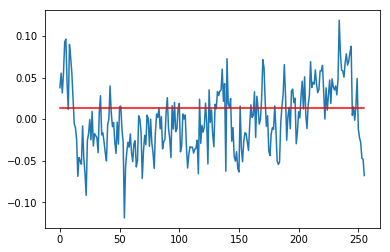

In [8]:
# 2. Vorhersagen durchführen:
# 2.1 t+1 
history = [x for x in ZR_TR_P]
model = ARIMA(history, order=(1,0,9))
model_fit = model.fit(disp=0)
predictions = list()
for t in range(len(ZR_TE_P)):
    model = ARIMA(history, order=(1,0,9))
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = ZR_TE_P[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(ZR_TE_P, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(ZR_TE_P)
pyplot.plot(predictions, color='red')
pyplot.show()

In [35]:
# 2.2 t+60
lag=60
history = [x for x in ZR_TR_P]
predictions = list()
for t in range(len(ZR_TE_P)):
    model = ARIMA(history, order=(1,0,9))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast(steps=lag)
    yhat = output[0]
    predictions.append(yhat)
    obs = ZR_TE_P[t]
    history.append(obs)

C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be t

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda\lib\site-packages\

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda\lib\site-packages\

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda\lib\site-packages\

Test MSE: 0.002


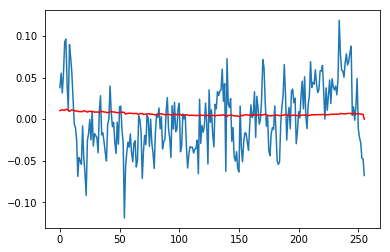

In [44]:
# 60ster Input je array von Interesse
predictions_60=[0]*len(predictions)
for t in range(len(predictions)-1):
    predictions_60[t]=predictions[t][lag-1]
    

error = mean_squared_error(ZR_TE_P, predictions_60)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(ZR_TE_P)
pyplot.plot(predictions_60, color='red')
pyplot.show()

C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be t

Test MSE: 0.002


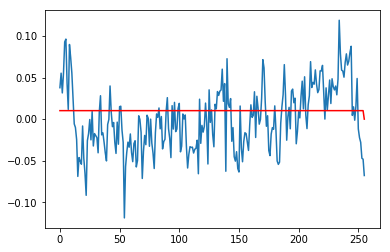

In [14]:
# 2.3 t+240
lag=240
history = [x for x in ZR_TR_P]
model = ARIMA(history, order=(1,0,9))
model_fit = model.fit(disp=0)
predictions = list()
for t in range(len(ZR_TE_P)):
    model = ARIMA(history, order=(1,0,9))
    output = model_fit.forecast(steps=lag)
    yhat = output[0]
    predictions.append(yhat)
    obs = ZR_TE_P[t]
    history.append(obs)

# 240ster Input je array von Interesse
predictions_240=[0]*len(predictions)
for t in range(len(predictions)-1):
    predictions_240[t]=predictions[t][lag-1]
    

error = mean_squared_error(ZR_TE_P, predictions_240)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(ZR_TE_P)
pyplot.plot(predictions_240, color='red')
pyplot.show()

In [9]:
# 3 Re-preprocessing
# 3.1: t+1
# invert differenced value
predictions=inverse_diff(ZR_TE_log,predictions, 12)

# invert log
predictions=np.exp(predictions)

In [45]:
# 3.2 t+60
# invert differenced value
predictions_60=inverse_diff(ZR_TE_log,predictions_60, 12)

# invert log
predictions_60=np.exp(predictions_60)

In [15]:
# 3.3 t+240
# invert differenced value
predictions_240=inverse_diff(ZR_TE_log,predictions_240, 12)

# invert log
predictions_240=np.exp(predictions_240)

6222605.5308690425


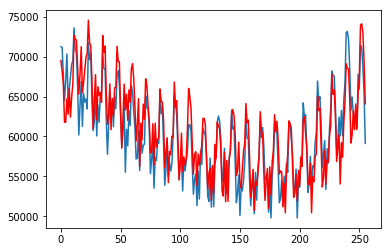

In [10]:
# 4 Vorhersage bewerten: MSE
# 4.1: t+1
error= mean_squared_error(ZR_TE_S,predictions)
print(error)
test=ZR_TE_S
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

5713524.346962744


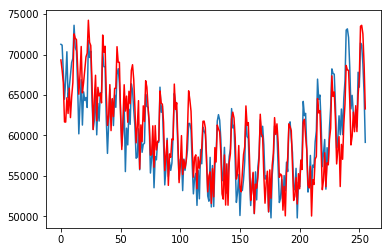

In [46]:
# 4.2
error= mean_squared_error(ZR_TE_S,predictions_60)
print(error)
test=ZR_TE_S
pyplot.plot(test)
pyplot.plot(predictions_60, color='red')
pyplot.show()

5960771.74638526


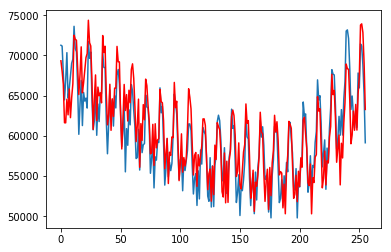

In [16]:
# 4.3
error= mean_squared_error(ZR_TE_S,predictions_240)
print(error)
test=ZR_TE_S
pyplot.plot(test)
pyplot.plot(predictions_240, color='red')
pyplot.show()